<a href="https://colab.research.google.com/github/catalinapesquet/RESEARCH-PROJECT-TEC/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
import os

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [50]:
# Replace path with your data directory
file_paths = glob.glob('/content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/MG63_withC/*.txt')

# Read and stock data
poisson_ratio = 0.5
relaxation_func= []
force = []
c = []
times = None

for file in file_paths:
  df = pd.read_csv(file, delim_whitespace=True, header=None)
  if times is None:
    times = df[0].values
  force.append(df[1].values)
  c.append(df[4])
force = np.array(force)
c = np.array(c)

for i in range(len(force)):
  C = c[i]
  F = force[i]
  Erel = F*(1 - poisson_ratio**2) / C
  relaxation_func.append(Erel)
relaxation_func = np.array(relaxation_func)

median_values = np.median(relaxation_func, axis=0)
Maxi= max(median_values)
force_normalized = relaxation_func / Maxi

<ipython-input-50-ce26e54cf9b2>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None)
<ipython-input-50-ce26e54cf9b2>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None)
<ipython-input-50-ce26e54cf9b2>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None)
<ipython-input-50-ce26e54cf9b2>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None)
<ipython-input-50-ce26e54cf9b2>:12: FutureWa

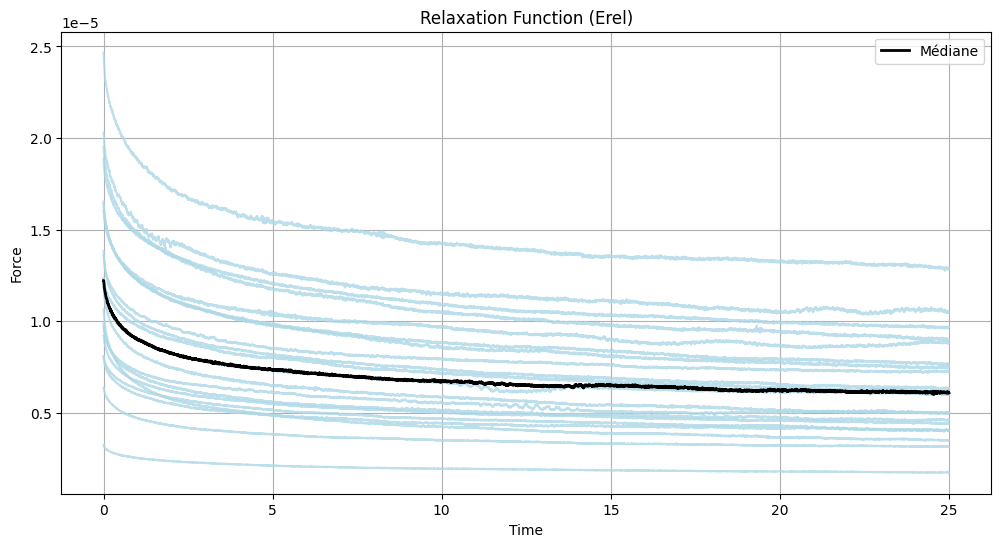

In [52]:
plt.figure(figsize=(12, 6))

for data in relaxation_func:
    plt.plot(times, data, alpha=0.8, color='lightblue')

# Ajouter la médiane
plt.plot(times, median_values, color='black', linewidth=2, label="Médiane")

plt.xlabel("Time")
plt.ylabel("Force")
plt.title("Relaxation Function (Erel)")
plt.legend()
plt.grid(True)
plt.show()


In [79]:
def plot_single_curve(index):
    if index < 1 or index > len(force_normalized):
        print("Invalid number.", len(force_normalized))
        return

    plt.figure(figsize=(10, 5))
    plt.plot(times, force_normalized[index - 1], color='lightblue', label=f"Curve number {index}")
    plt.xlabel("Time")
    plt.ylabel("Normalized Force")
    plt.title(f"2019 09 07 OsteosarcomaControl3D_Oscillogram - DFL(t)_time_Frel_deltaMax19F1 {index}")
    plt.legend()
    plt.grid(True)
    plt.show()

They are 21 curves. Enter a number between 1 and 21.
Number of the curve 2


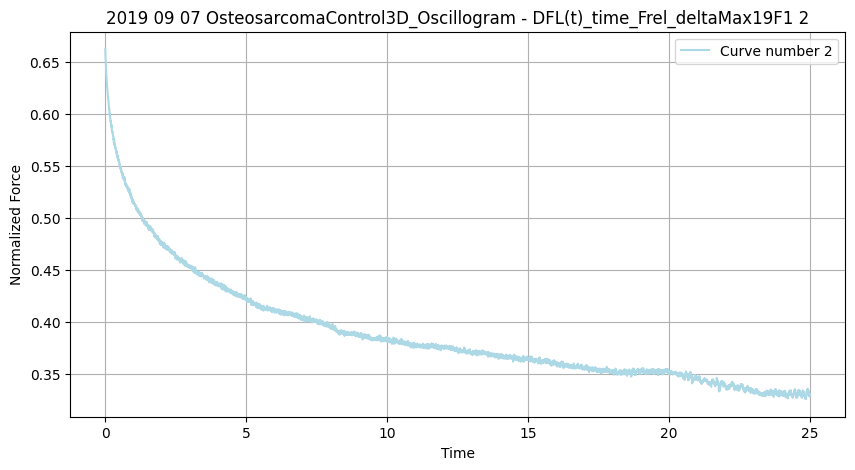

In [80]:
print(f"They are {len(force_normalized)} curves. Enter a number between 1 and {len(force_normalized)}.")

selected_curve = int(input("Number of the curve "))
plot_single_curve(selected_curve)

In [78]:
import os
output_folder = "/content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data preparation/MG63_force_normalized"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i, sublist in enumerate(relaxation_func):
    filename = f"MG63_{i + 1}.txt"
    file_path = os.path.join(output_folder, filename)

    print(f"Enregistrement du fichier : {file_path}")

    with open(file_path, "w") as f:
        for time, value in zip(times, sublist):
            f.write(f"{time} {value}\n")

print(f"Tous les fichiers sont enregistrés dans : {output_folder}")



Enregistrement du fichier : /content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data preparation/MG63_force_normalized/MG63_1.txt
Enregistrement du fichier : /content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data preparation/MG63_force_normalized/MG63_2.txt
Enregistrement du fichier : /content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data preparation/MG63_force_normalized/MG63_3.txt
Enregistrement du fichier : /content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data preparation/MG63_force_normalized/MG63_4.txt
Enregistrement du fichier : /content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data preparation/MG63_force_normalized/MG63_5.txt
Enregistrement du fichier : /content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data preparation/MG63_force_normalized/MG63_6.txt
Enregistrement du fichier : /content/gdrive/MyDrive/Projet Tec/E_Zener_MG63-main/E_Zener_MG63-main/Data pr